# 판다스

1. 설치해야 하는 라이브러리
2. 자료구조 : 시리즈, 데이터프레임
3. https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [4]:
import pandas as pd

# 1. 데이터 읽기

In [5]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head() #위의 5건 출력 - default, subset

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 1.1 데이터프레임 이해하기

In [6]:
df.shape # (row,col), 건수, 항목수

(1704, 6)

In [7]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [10]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

EDA 탐색적 데이터 분석 -  shape, columns, dtypes

dtype object : str

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 1.2 데이터 추출하기

### 1.2.1 열추출

In [14]:
type(df['country']) #시리즈객체

pandas.core.series.Series

In [15]:
df1 = df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [18]:
df[ ['country', 'continent'] ]  # [속성목록] 이용해서 데이터프레임 추출

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [50]:
#보고 싶은 컬럼 4개를 추출한 서브셋을 생성
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [20]:
df2 = df[ [ 'country', 'year', 'lifeExp', 'gdpPercap' ] ]
df2.head()

,country,year,lifeExp,gdpPercap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


In [21]:
type(df1), type(df2)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 1.2.2 행추출

1. loc [ 행 이름 ], default rangeindex -> number, 인덱스의 이름을 변경 -> 이름으로 추출
2. iloc [ 행번호 ] 

In [6]:
df.loc[ 0 ]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [7]:
#100번째 행 추출
df.loc[ 99 ]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [13]:
# - index

#df.loc[ -1 ]
df.loc[   df.shape[ 0 ] - 1  ] #row 수

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [14]:
#여러 행을 추출 - [] 로 지정
df.loc[ [0,1,4] ]


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [15]:
#현재 데이터프레임에서는 loc[] iloc[]가 동일
df.iloc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [51]:
# loc[], iloc[] 의 차이는 컬럼을 꺼내는 방식

df.loc[ [0] , [ 'country' ]   ]  #행, 열을 같이 지정해서 추출 ,로 구분


,country
0,Afghanistan


In [18]:
df.iloc[  [0] , [ 0 ]      ]

,country
0,Afghanistan


In [21]:
# slicing  :  colon
df.loc[ :10 ,  [ 'country' ]  ] # 전체일때는 : 표시 (시작,끝 생략)

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


In [ ]:
df.iloc[ :10 ,  [ 0 ]  ] 

### 1.2.3 range()

In [28]:
r_list = list(range(1,5,2)) #step의 사용
df.iloc[ :, r_list ]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [31]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [30]:
df.iloc[ : , ::2 ]  # :을 이용한 slicing 구문 

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [32]:
#iloc로 'gdpPercap' 속성의 처음 10개행 추출

df.iloc[ :10, [-1]]

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 1.3 기초 통계 계산하기

In [33]:
#descriptive - numeric data
# 전체 데이터의 요약

df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [34]:
#그룹화 > df 분할 > 통계
#연도별 기대수명 평균
#대륙별 국가 갯수
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [37]:
df.groupby('year')[ 'lifeExp' ].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [42]:
# 대륙별 인구pop 의 최대값
df.groupby('continent')['pop'].max().sort_index(ascending=False)

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [43]:
#최대값 기준으로 정렬하기
df.groupby('continent')['pop'].max().sort_values(ascending=False)

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [44]:
# 빈도수 계산 nunique()
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [46]:
#value_counts()

df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

### 1.4 그래프로 그리기

In [49]:
year_lifeExp_mean = df.groupby('year')[ 'lifeExp' ].mean()
year_lifeExp_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

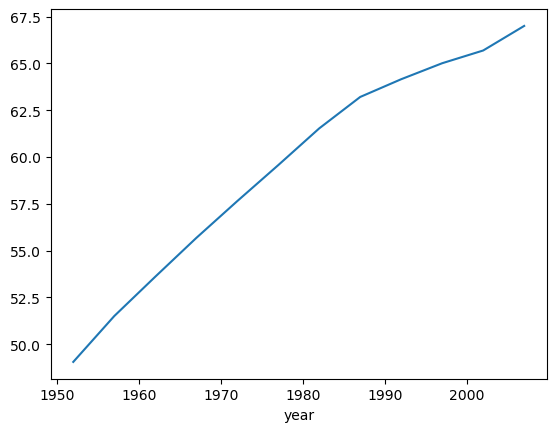

In [48]:
year_lifeExp_mean.plot()

# 2. 데이터 다루기

## 2.1 시리즈 만들기

- 1차원 자료 : 리스트 유사, 넘파이의 어레이를 기본으로 만들어짐
- 한 열의 데이터는 모두 동일한 타입
- 

In [53]:
import pandas as pd

In [56]:
s = pd.Series( ['banana', 10] )
type(s)

pandas.core.series.Series

In [57]:
s #RangeIndex

0    banana
1        10
dtype: object

In [58]:
s1 = pd.Series( data= ['홍길동','김길동'] , index= ['a', 'b'] )
s1

a    홍길동
b    김길동
dtype: object

In [59]:
s1.head()

a    홍길동
b    김길동
dtype: object

In [60]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [62]:
s1.loc['a']

'홍길동'

In [64]:
s1.iloc[0]

'홍길동'

## 2.2 데이터프레임 만들기

In [67]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [68]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [72]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [73]:
scientists.index = ["Rosaline Franklin", "William Gosset"]

In [74]:
scientists

,Name,Occupation,Born,Died,Age
Rosaline Franklin,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [70]:
#name column 을 인덱스로 지정해서 데이터 프레임 생성하기
scient1 = pd.DataFrame(
    data = {
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
    }
    ,
    index = ["Rosaline Franklin", "William Gosset"]
)

In [71]:
scient1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [79]:
f_row = scient1.loc['Rosaline Franklin']#, iloc[]
f_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

In [80]:
f_row.index

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [81]:
f_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [83]:
scient1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [86]:
scient1.loc[:,'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [88]:
age = scient1['Age']
age.mean() #평균, 최소값, 최대값, 표준편차

49.0

In [89]:
scient2 = pd.read_csv('./data/scientists.csv')

In [96]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [91]:
scient2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [93]:
ages = scient2['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [94]:
ages.describe() #기술통계량 확인, ages.mean()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [95]:
ages[  ages > ages.mean()  ]  #벡터화, 불리언값 리스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [97]:
ages + ages #element wise - vector + vector - rank1 array

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [98]:
ages + 10 #vector + scalar > broadcasting 

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [100]:
s1 = pd.Series([1,100])
s1

0      1
1    100
dtype: int64

In [101]:
ages + s1 #넘파이의 브로드캐스팅과 차이, 반드시 벡터의 길이가 같아야 한다.

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

## 2.3 인덱스

In [103]:
#default 는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [109]:
rev_ages = ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [107]:
ages*2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [108]:
ages + rev_ages  #같은 인덱스를 기준으로 자동 정렬, 연산 수행

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [110]:
first_half = scient2[:4]
second_half = scient2[4:]
first_half

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [128]:
pd.concat([first_half, second_half])

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [112]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [111]:
#데이터프레임에 스칼라 연산 - column의 type에 따라 연산
scient2*2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [113]:
#숫자로 구성한 데이터프레임의 더하기 연산 + , add()
df1 = df2 = pd.DataFrame(
                data = [[1,2,3],[4,5,6]]
            )
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


## 2.4 열추가

In [116]:
scient2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [117]:
#str > datetime
born_datetime = pd.to_datetime( scient2['Born'], format='%Y-%m-%d' )
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [119]:
scient2['born_dt'] = born_datetime
scient2.head(3)

,Name,Born,Died,Age,Occupation,born_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12


In [120]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 516.0+ bytes


In [131]:
scient2['died_dt']  = pd.to_datetime( scient2['Died'], format='%Y-%m-%d' )
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [136]:
scient2['age_days'] = scient2['died_dt'] - scient2['born_dt'] 
scient2['age_days'].dtype

dtype('<m8[ns]')

In [134]:
#series.apply(함수)
import numpy as np

scient2['age_days'] = (scient2['age_days'].dt.days / 365).apply( np.floor ) #numpy의 수학함수
scient2['age_days'].dtypes

dtype('float64')

In [140]:
#df.assign( col_name = 수식), col_name은 새로 만들어짐.

scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'] ,
    age_assign = (scient2['age_days'].dt.days / 365).apply( np.floor ) #임시컬럼을 따로 만든다.
)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [146]:
#df.assign( col_name = 수식), col_name은 새로 만들어짐.

scient2 = scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'] ,
    #기존의 컬럼을 이용해서 계산한 결과를 새로운 컬럼에 할당
    age_assign = ((scient2['died_dt'] - scient2['born_dt']).dt.days / 365).apply( np.floor ) 
)


In [147]:
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


## 2.5 열 삭제

In [145]:
scient3_d = scient2.drop( ['Age'] , axis='columns') # 1
scient3_d #삭제된 데이터프레임

,Name,Born,Died,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days


In [144]:
scient2 #그대로

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [ ]:
scient2.drop( ['Age'] , axis='columns', inplace=True)  #원본대체

## 2.6 파일 저장

- 피클로 저장 (객체화, Serialize)
- 파이썬의 데이터파일 형식 : 바이너리 저장/읽기, .pickle/.pkl/.p
- 시리즈, 데이터프레임 저장
- csv, tsv, excel 지원
- to_csv(), read_csv()
- excel의 경우는 openpyxl 을 설치해야 한다.
- pip install openpyxl

In [149]:
scient2['Name']

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

파이썬 내장 모듈
```
fp = open()
load(fp) #read
dump(fp) #write
```

In [150]:
scient2['Name'].to_pickle('./data/scientist_names_series.pickle') #저장경로/파일이름

In [151]:
#피클 파일에서 읽어오기
series_pkl = pd.read_pickle('./data/scientist_names_series.pickle')
series_pkl

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [153]:
#데이터프레임을 저장, 다시 읽어오기
scient2.to_pickle('./data/scientist_df.pickle')

In [154]:
pd.read_pickle('./data/scientist_df.pickle')

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [155]:
scient2.to_csv('./data/scientist_df.csv')

In [157]:
scient2_csv_df = pd.read_csv('./data/scientist_df.csv')
type(scient2_csv_df)

pandas.core.frame.DataFrame

In [158]:
scient2.head(2)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0


In [159]:
# 사전형식과 데이터프레임의 변환

sci_dict = scient2.to_dict()
sci_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Age': {0: 37, 1: 61, 2: 90, 3: 66, 4: 56, 5: 45, 6: 41, 7: 77},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timesta

In [161]:
sci_dict_df = pd.DataFrame.from_dict(sci_dict)
sci_dict_df

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [174]:
# df > json
sci_json = scient2.to_json(orient='records', indent=2, date_format='iso')
            
type(sci_json)

str

In [171]:
#raw 형식의 데이터 출력 형식을 지정할수 있다.
import pprint
pprint.pprint(sci_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Age":37,\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age_days":"P13779DT0H0M0S",\n'
 '    "age_days_assign":"P13779DT0H0M0S",\n'
 '    "age_assign":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Age":61,\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age_days":"P22404DT0H0M0S",\n'
 '    "age_days_assign":"P22404DT0H0M0S",\n'
 '    "age_assign":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Age":90,\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'


In [176]:
#json > df 생성
#dataframe을 이용해 다양한 파일의 형식으로 변환

df_json = pd.read_json(sci_json)

In [177]:
df_json.to_pickle('./data/sci_json.pickle')

# 3. 데이터 전처리

## 3.1 깔끔한 데이터
1. 열이름 : 변수가 아니라 변수의 값이 온 경우 1개가 아니라 여러개
2. 열이름에 데이터가 포함된 경우 : long data로 변환 > 필요한 칼럼으로 분할해서 데이터프레임에 추가
3. ???

### 3.1.1 한 변수가 여러 열에 걸쳐진 경우

In [22]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [21]:
# 분산되어 있는 컬럼을 하나로 합친다. > wide data 를 long data로 만들기
# 하나의 컬럼으로 합치기 > 언피봇 '피봇되돌리기' > melt()
pew_long = pew.melt(id_vars='religion', var_name='income', value_name='count')
pew_long.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [20]:
billboard = pd.read_csv('./data/billboard.csv')
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
billboard_long = billboard.melt(id_vars=['year','artist','track'], value_name='wk')
billboard_long.head()

,year,artist,track,variable,wk
0,2000,2 Pac,Baby Don't Cry (Keep...,time,4:22
1,2000,2Ge+her,The Hardest Part Of ...,time,3:15
2,2000,3 Doors Down,Kryptonite,time,3:53
3,2000,3 Doors Down,Loser,time,4:24
4,2000,504 Boyz,Wobble Wobble,time,3:35


In [33]:
evola = pd.read_csv('./data/country_timeseries.csv')
evola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


### 3.1.2 한 열에 여러 변수

In [28]:
evola_long = evola.melt(id_vars= ['Date','Day'])
evola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [48]:
var_split = evola_long.variable.str.split('_')
var_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [38]:
status_values = var_split.str.get(0)
contry_values = var_split.str.get(1)
type(status_values)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [42]:
evola_long['status'] = status_values
evola_long['contry'] = contry_values

In [44]:
evola_long.head()

,Date,Day,variable,value,status,contry
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [45]:
evola_long1 = evola.melt(id_vars= ['Date','Day'])

In [47]:
var_split_1 = evola_long1.variable.str.split('_', expand=True)
var_split_1

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [50]:
evola_long1[ ['status', 'country'] ] = var_split_1
evola_long1.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


### 3.1.3 행에도 중복 데이터가 있을 때

In [7]:
import pandas as pd
weather = pd.read_csv('./data/weather.csv')
(weather.columns)

Index(['id', 'year', 'month', 'element', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16',
       'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26',
       'd27', 'd28', 'd29', 'd30', 'd31'],
      dtype='object')

In [11]:
len(weather), len(weather.columns)

(22, 35)

In [9]:
weather.head(3)

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Unpivot
w_melt = weather.melt(
    id_vars = ['id', 'year', 'month', 'element'],
    var_name = 'day',
    value_name = 'temp'
)
w_melt
# 세로로 늘리기 > 언피봇
# 가로로 늘리기 > 피봇

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [16]:
# Pivot element column

w_tidy = w_melt.pivot_table(
    index = ['id', 'year', 'month', 'day'],
    columns = 'element',
    values = 'temp'
)
w_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [17]:
# 결과 데이터프레임의 헤더를 평탄화
w_tidy_flat = w_tidy.reset_index()
w_tidy_flat

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


## 3.2 데이터프레임에 함수를 적용하기

In [25]:
df = pd.DataFrame(
    {'a' : [10,20,30],
     'b' : [20,30,40]}
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


In [27]:
df['a'] ** 2

0    100
1    400
2    900
Name: a, dtype: int64

### 3.2.1 사용자정의함수 UDF(User Define Function)를 시리즈, 데이터프레임에 적용

In [28]:
type(df['a'])

pandas.core.series.Series

In [29]:
# 시리즈를 열 선택
df['a']

0    10
1    20
2    30
Name: a, dtype: int64

In [30]:
def my_sq(x):
    return x**2

In [31]:
# 시리즈로 열 선택
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [32]:
# 행 선택, 함수 적용
df.iloc[0].apply(my_sq)

a    100
b    400
Name: 0, dtype: int64

In [33]:
# 매개변수 2개
def my_exp(x, e):
    return x**e

In [34]:
df['a'].apply(my_exp, e=2) # 추가 매개변수 이름 = 값 지정

0    100
1    400
2    900
Name: a, dtype: int64

In [36]:
df.iloc[0].apply(my_exp, e=3)

a    1000
b    8000
Name: 0, dtype: int64

In [39]:
# 데이터프레임 전체에 연산 적용
df

,a,b
0,10,20
1,20,30
2,30,40


In [38]:
df.apply(my_exp, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [40]:
df.apply(my_exp, e=3, axis=0)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [41]:
df.apply(my_exp, e=3, axis=1)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [42]:
def print_me(x): # 벡터화 되지 않는 연산
    print(x)

In [43]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [62]:
# 변수 3개 연습
def avg_3(x,y,z):
    return (x+y+z)/3

In [61]:
# 연습문제

import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}

df = pd.DataFrame(data)
df

,Name,Age,Salary
0,Alice,25,5000
1,Bob,45,7000
2,Charlie,35,6500
3,David,32,5500
4,Eva,28,6000


In [51]:
#나이에 따라 직원을 분류하는 함수 정의
# young, mid, experience

def age_sep(age):
    if age < 30:
        return 'young' 
    elif (age >= 30) & (age < 40):
        return 'mid' 
    else:
        return 'experience'

In [60]:
#데이터프레임에 나이(Age)에 따라 직원 분류 함수 적용해서 'Category' 컬럼을 추가
category = df['Age'].apply(age_sep)
df['Category'] = category
df

,Name,Age,Salary,Category
0,Alice,25,5000,young
1,Bob,45,7000,experience
2,Charlie,35,6500,mid
3,David,32,5500,mid
4,Eva,28,6000,young


In [75]:
# salary에 보너스 10%를 증가한 컬럼 'Bonus'를 추가 > 람다함수 사용

bonus = df['Salary'].apply( lambda x : x*1.1 ).astype(int)
df['Bonus'] = bonus
df

,Name,Age,Salary,Bonus
0,Alice,25,5000,5500
1,Bob,45,7000,7700
2,Charlie,35,6500,7150
3,David,32,5500,6050
4,Eva,28,6000,6600


## 3.3 데이터 결합하기

In [77]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [81]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [82]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [83]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [94]:
total_concat = pd.concat( [ df1, df2, df3 ], ignore_index=True ) # ,ignore_index = True
total_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [87]:
total_concat.loc[3]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [95]:
total_concat.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,4,a4,b4,c4,d4
5,5,a5,b5,c5,d5
6,6,a6,b6,c6,d6
7,7,a7,b7,c7,d7
8,8,a8,b8,c8,d8
9,9,a9,b9,c9,d9


In [97]:
add_s = pd.Series(['a100','b100','c100','d100'])
type(add_s)

pandas.core.series.Series

In [99]:
new_add_s = pd.concat([total_concat,add_s])
new_add_s

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,a8,b8,c8,d8,NaN
9,a9,b9,c9,d9,NaN


#### 3.3.1 행 연결하기

In [104]:
# df으로 바꿔서 넣는다
new_df = pd.DataFrame(data = [ ['a100','b100','c100','d100'] ],
             columns = ['A', 'B', 'C', 'D']
            )
new_df

,A,B,C,D
0,a100,b100,c100,d100


In [106]:
new_add_s1 = pd.concat( [total_concat, new_df] , ignore_index=True )
new_add_s1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


### 3.3.2 열 연결하기

In [111]:
col_concat = pd.concat([df1,df2,df3], axis='columns') #1
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [112]:
# 열 이름으로 A컬럼 추출
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [117]:
# 리스트를 이용해 새로운 열로 추가
col_concat['new_col'] = ['n1','n2','n3','n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [118]:
col_concat['new_col_s'] = pd.Series(['n1','n2','n3','n4'])
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col,new_col_s
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4,n4


In [119]:
col_concat = pd.concat([df1,df2,df3], ignore_index=True, axis='columns')
col_concat

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [121]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [122]:
row_concat = pd.concat([df1,df2,df3])
row_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [156]:
row_concat = pd.concat([df1,df2,df3], join='inner') #공통인 것만 가져온다 ... inner / outer(full/left/right)
row_concat

""
0
1
2
3
0
1
2
3
0
1


In [124]:
# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})

In [125]:
january

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250


In [126]:
february

,Date,Sales
0,2023-02-01,300
1,2023-02-02,350


In [134]:
pd.concat([january,february], axis=0) # row (default)

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250
0,2023-02-01,300
1,2023-02-02,350


In [127]:
# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})

In [128]:
store_a

,Date,Sales_A
0,2023-01-01,200
1,2023-01-02,250


In [129]:
store_b

,Date,Sales_B
0,2023-01-01,300
1,2023-01-02,350


In [138]:
pd.concat([store_a, store_b], axis=1)

,Date,Sales_A,Date,Sales_B
0,2023-01-01,200,2023-01-01,300
1,2023-01-02,250,2023-01-02,350


In [139]:
pd.concat([store_a.set_index('Date'), store_b.set_index('Date')], axis=1)

,Sales_A,Sales_B
Date,,
2023-01-01,200,300
2023-01-02,250,350


In [141]:
pd.concat([store_a.set_index('Date'), store_b.set_index('Date')], axis=1).reset_index()

,Date,Sales_A,Sales_B
0,2023-01-01,200,300
1,2023-01-02,250,350


In [130]:
# 상점 C의 매출 데이터
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

# 상점 D의 매출 데이터
store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})

In [131]:
store_c

,Date,Sales_C
0,2023-01-01,220
1,2023-01-03,280


In [132]:
store_d

,Date,Sales_D
0,2023-01-02,330
1,2023-01-03,370


In [153]:
pd.concat( [store_c.set_index('Date'), store_d.set_index('Date')], axis=1 ).reset_index()

,Date,Sales_C,Sales_D
0,2023-01-01,220.0,NaN
1,2023-01-03,280.0,370.0
2,2023-01-02,NaN,330.0


### 228페이지 분할된 데이터 만들기

In [189]:
from pathlib import Path

billboard_data_files = (
    Path(".")
    .glob("./data/billboard-by_week/billboard-*.csv")
)

list_billboard_df = []

for csv_filename in billboard_data_files:
    df = pd.read_csv(csv_filename)
    list_billboard_df.append(df)

len(list_billboard_df)

76

In [200]:
billboard_loop_concat = pd.concat(list_billboard_df)
len(billboard_loop_concat)

24092

In [196]:
# 컴프리헨션으로 구현

from pathlib import Path

billboard_data_files = (
    Path(".")
    .glob("./data/billboard-by_week/billboard-*.csv")
)

billboard_dfs = [pd.read_csv(data) for data in billboard_data_files]
type(billboard_dfs), len(billboard_dfs)

(list, 76)

In [202]:
billboard_concat_comp = pd.concat(billboard_dfs)
len(billboard_concat_comp)

24092

### join 병합 : merge() 

In [203]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [204]:
sales_data

,CustomerID,Date,Amount
0,101,2023-01-01,250
1,102,2023-01-03,300
2,103,2023-01-05,150
3,104,2023-01-07,400


In [205]:
customer_data

,CustomerID,Name,Region
0,101,Alice,North
1,102,Bob,South
2,103,Charlie,East
3,105,Eva,West


In [210]:
pd.merge( sales_data, customer_data, on='CustomerID' ) # join=inner, on=키, 공통의 키가 존재하는 경우 병합

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [211]:
pd.merge( sales_data, customer_data, on='CustomerID', how='outer' ) #how=inner가 디폴트

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [209]:
pd.merge( sales_data, customer_data, on='CustomerID', how='right' )

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,105,NaN,NaN,Eva,West


### 245페이지 데이터테이블 정규화
곡정보 + 순위정보 를 나누어서 2개의 데이터프레임에 만든다.

In [212]:
import pandas as pd

billboard = pd.read_csv('./data/billboard.csv')

billboard_long = billboard.melt(
    id_vars = ['year','artist','track','time','date.entered'],
    var_name = 'week',
    value_name = 'rating'
)

billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [214]:
billboard_songs = billboard_long[ ['year','artist','track','time','date.entered'] ]
billboard_songs

,year,artist,track,time,date.entered
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15
...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02


In [215]:
billboard_songs = billboard_songs.drop_duplicates()
billboard_songs

,year,artist,track,time,date.entered
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15
...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02


In [225]:
billboard_songs.loc[:,'id'] = billboard_songs.index + 1
billboard_songs

,year,artist,track,time,date.entered,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,2
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,3
3,2000,3 Doors Down,Loser,4:24,2000-10-21,4
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,5
...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,313
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,314
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,315
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,316


In [229]:
billboard_ratings = pd.merge(
    billboard_long,
    billboard_songs,
    on = ['year','artist','track','time','date.entered']
)
billboard_ratings

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0,2
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0,3
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0,4
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0,5
...,...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN,313
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN,314
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN,315
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN,316


In [230]:
billboard_ratings = billboard_ratings[
    ['id','week','rating']
]
billboard_ratings

,id,week,rating
0,1,wk1,87.0
1,2,wk1,91.0
2,3,wk1,81.0
3,4,wk1,76.0
4,5,wk1,57.0
...,...,...,...
24087,313,wk76,NaN
24088,314,wk76,NaN
24089,315,wk76,NaN
24090,316,wk76,NaN


## 3.4 그룹 연산하기

### 3.4.1 데이터 집계 groupby()

In [288]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [234]:
df.shape[0]

1704

In [236]:
df.describe() # numeric

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [241]:
df.groupby('country').lifeExp.mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [244]:
!python --version # 파이썬 버전 확인

Python 3.12.4


In [252]:
#대륙별 평균 기대수명
df.groupby('continent').lifeExp.mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [254]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [257]:
df.groupby(['continent','year']).lifeExp.mean() #datafram의 columns

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

![](image.png)

In [268]:
import numpy as np

df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max]) # agg 함수

C:\Users\tangerines\AppData\Local\Temp\ipykernel_14692\3523822705.py:3: FutureWarning: The provided callable <function mean at 0x000001AB5FF772E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max]) # agg 함수
C:\Users\tangerines\AppData\Local\Temp\ipykernel_14692\3523822705.py:3: FutureWarning: The provided callable <function std at 0x000001AB5FF77420> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max]) # agg 함수
C:\Users\tangerines\AppData\Local\Temp\ipykernel_14692\3523822705.py:3: FutureWarning: The provided callable <function min at 0x000001AB5FF76A20> is currently using SeriesGroupBy.min. In a future versi

,mean,std,min,max
continent,,,,
Africa,48.865330,9.150210,23.599,76.442
Americas,64.658737,9.345088,37.579,80.653
Asia,60.064903,11.864532,28.801,82.603
Europe,71.903686,5.433178,43.585,81.757
Oceania,74.326208,3.795611,69.120,81.235


In [267]:
df.groupby('continent').agg(
    {
        'lifeExp' : 'mean',
        'pop' : 'median',
        'gdpPercap' : 'max'
    }
)
# agg(udf) : 사용자 정의 함수 사용 가능

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,21951.21176
Americas,64.658737,6227510.0,42951.65309
Asia,60.064903,14530830.5,113523.13290
Europe,71.903686,8551125.0,49357.19017
Oceania,74.326208,6403491.5,34435.36744


### 3.4.2 데이터 변환 transform()

In [ ]:
def my_zscore(x): # 표준점수, 나의 값이 전체 데이터 평균과 비교해서 얼마나 떨어져 있는지 보여주는 점수
    return ( (x - x.mean()) / x.std() )

In [270]:
df.groupby('continent').lifeExp.transform(my_zscore)

0      -2.635073
1      -2.506033
2      -2.365698
3      -2.195190
4      -2.020889
          ...   
1699    1.473810
1700    1.258077
1701   -0.224730
1702   -0.970068
1703   -0.587782
Name: lifeExp, Length: 1704, dtype: float64

In [272]:
# 갯수 세는 함수.count()
df.groupby('continent').count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


In [273]:
country_s = df['country']
country_s.value_counts()

country
Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: count, Length: 142, dtype: int64

In [293]:
df1 = df[ df['year']>2000 ]
df1

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
22,Albania,Europe,2002,75.651,3508512,4604.211737
23,Albania,Europe,2007,76.423,3600523,5937.029526
34,Algeria,Africa,2002,70.994,31287142,5288.040382
...,...,...,...,...,...,...
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1690,Zambia,Africa,2002,39.193,10595811,1071.613938
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [302]:
df1.groupby('continent').filter( lambda x : x['pop'].mean()>9729525 )

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
22,Albania,Europe,2002,75.651,3508512,4604.211737
23,Albania,Europe,2007,76.423,3600523,5937.029526
34,Algeria,Africa,2002,70.994,31287142,5288.040382
...,...,...,...,...,...,...
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1690,Zambia,Africa,2002,39.193,10595811,1071.613938
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## 3.5 결측치 처리
NAN  NaN  nan

In [2]:
from numpy import NAN, NaN, nan

In [6]:
import pandas as pd
print(pd.isnull(NaN))
print(pd.notnull(NaN))

True
False


In [8]:
print(NaN==True)

False


### 3.5.1 결측값이 생기는 이유

#### 데이터를 불러올 때 생기는 결측치

- 판다스가 데이터를 불러올 때 값이 없으면 NaN으로 대체
- na_value, keep_default_na, na_fillter

In [16]:
import pandas as pd
file_dir = './data/survey_visited.csv'
file_dir2 = './data/survey_survey.csv'
visited_df = pd.read_csv(file_dir)
survey_df = pd.read_csv(file_dir2)

In [71]:
pd.read_csv(file_dir, keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


#### 데이터 연결할 때

- concat()
- merge()
- join 을 할 때, 열이 다르거나, 인덱스가 다를 때

In [22]:
visited_df.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [21]:
survey_df.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [23]:
new_df = visited_df.merge(survey_df, left_on='ident', right_on='taken')
new_df.head()

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41


In [33]:
file_dir3 = './data/gapminder.tsv'
gap_df = pd.read_csv(file_dir3, sep='\t')
gap_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [40]:
new_df = gap_df.groupby(['year'])['lifeExp'].mean()
new_df

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [39]:
y2000 = new_df[ new_df.index > 2000 ]
y2000

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [38]:
y2000.reindex(range(2000,2010), fill_value=0)

year
2000     0.000000
2001     0.000000
2002    65.694923
2003     0.000000
2004     0.000000
2005     0.000000
2006     0.000000
2007    67.007423
2008     0.000000
2009     0.000000
Name: lifeExp, dtype: float64

### 3.5.2 결측치의 처리

- 결측치가 얼마나 있나? count()
- 어디에 있나? 컬럼, 행의 위치

In [47]:
import pandas as pd

ebola = pd.read_csv('./data/country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print(ebola.count()) # 누락값을 제외한 값의 개수를 센다

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64


In [48]:
# 열별 누락값 계산
total_r = ebola.shape[0]
num_missing = total_r - ebola.count()
num_missing

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [49]:
# 전체 누락값
import numpy as np

np.count_nonzero(ebola.isnull())

1214

In [55]:
ebola.Cases_Guinea.value_counts(dropna=False)

Cases_Guinea
NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
1199.0     1
1298.0     1
1350.0     1
1472.0     1
49.0       1
Name: count, Length: 89, dtype: int64

In [57]:
ebola.fillna(0).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


In [61]:
ebola.fillna(method='ffill').head()

C:\Users\tangerines\AppData\Local\Temp\ipykernel_20372\206624273.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method='ffill').head()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [62]:
ebola.fillna(method='bfill').tail()

C:\Users\tangerines\AppData\Local\Temp\ipykernel_20372\1277319470.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method='bfill').tail()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# 결측치 삭제
ebola.shape

(122, 18)

In [65]:
new_ebola = ebola.dropna()
new_ebola.shape

(1, 18)

In [67]:
# 결측치를 포함한 계산
ebola['cases_multip'] = (
    ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']
)
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,cases_multip
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,20657.0
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,20478.0


In [69]:
ebola.Cases_Guinea.sum( skipna=True ) # 결측치를 무시하고 계산

84729.0

In [70]:
ebola.Cases_Guinea.sum( skipna=False ) # default, 결측치를 포함한 계산

nan